# Import Library

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read & Analyze Data

In [2]:
file_path = 'training_data.csv'
df = pd.read_csv(file_path)
df.head()

,size (square feet),number of bedrooms,price ($)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


- Comment: 
    + There are 3 columns with respect to the size of the house in square feet, number of bedrooms and its price in dollars.
    + So, we tend to use the first 2 columns as the input for our Linear Regression model to predict the price of the house (the last column).

In [3]:
df.describe()

,size (square feet),number of bedrooms,price ($)
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


- Comment:
    + There are 47 examples of House Pricing Data.
    - **Size**:
        + These houses have the **mean size** of **2000.68** square feet (SF). 
        + The standard deviation for the size of the houses is **794.70**, which means that the size of the houses varies quite a bit from the average.
        + Most of the houses (**75%**) in the dataset have a size **less than 2269**, although the range of this column is from **852** to **4478** SF.
    - **Number of bedrooms**:
        + The number of houses have the mean of **3.17**, standard deviation of **0.76** and go from **1** to **5**. 
        + The majority of the houses in the dataset have **3** or **4** bedrooms, as the *50%* is 3 bedrooms and the *75%* is 4 bedrooms. So, *if these descriptions hold as the dataset gets larger*, maybe we could consider that the house with 1, 2 or 5 bedrooms are *outliers* of the dataset.
    - **Price**:
        + The house prices range from **$169,9** to **$699,9**, with a **mean price** of **$340,412.66** and a standard deviation of **$125,039.90**.
        + Most of the houses in the dataset are priced between **$249,90** and **$384,45**.


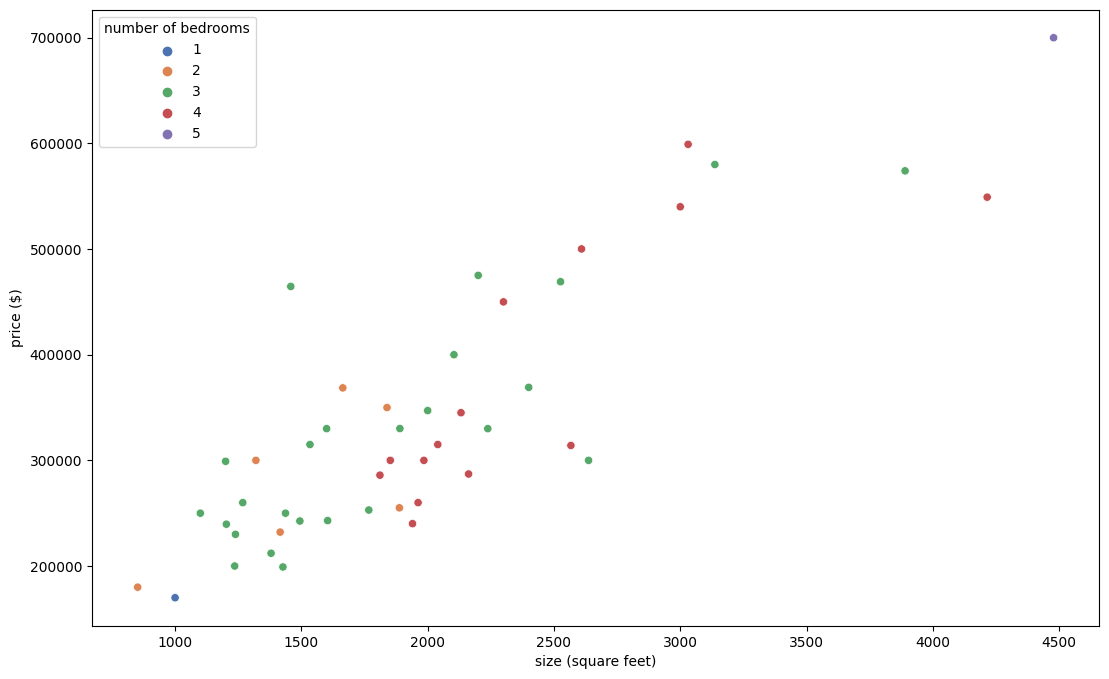

In [4]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(data=df, x='size (square feet)', y='price ($)', 
                     hue='number of bedrooms', palette='deep')
plt.show()

- Comment: 
    + The data is slightly skewed to the left (the side close to 0).
    + However, this dataset has just 47 examples, so we can't conclude anything. But we are going to build a Multivariate Linear Regression model to estimate the price of the houses, so we assume that the dataset has Gaussian distribution when it grows larger. 
        - &rarr; We're going to use **Standardization** to make sure the features are around a mean of 0 with a standard deviation of 1.

# Helper Functions

In [5]:
def standardize_train_set(X):
    #todo
    mu = np.mean(X, axis=0)
    #todo
    sigma = np.std(X, axis=0)
    #todo
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [6]:
def standardize_test_set(X, mu, sigma):
    #todo
    return (X - mu) / sigma

In [7]:
class LinearRegression:
    def __init__(self, alpha=0.001, iters=1000, verbose=False):
        self.alpha = alpha
        self.iters = iters
        self.verbose = verbose
        self.theta = None
    
    def calculate_absolute_error(self, X, y, theta):
        #todo
        y_pred = np.dot(X, theta)
        return np.sum(np.abs(y - y_pred)) / len(y)
    
    def gradient(self, X, y, theta):
        m = len(y)

        #todo
        h_theta = np.dot(X, theta)
        loss = h_theta - y

        #todo
        dJ = np.dot(X.T, loss) / m
        J = np.sum((loss ** 2) / (2*m))

        return (J, dJ)
    
    def gradient_descent(self, X, y):
        X = np.c_[np.ones(len(X),dtype='int64'), X]
        theta = np.zeros(X.shape[1])
        print(f'The total of training sample: {len(y)}')
        for i in range(self.iters):
            #todo
            J, dJ = self.gradient(X, y, theta)
            #todo
            theta = theta - self.alpha * dJ
            if self.verbose:
                print(f'Iter {i + 1}, loss = {self.calculate_absolute_error(X, y, theta)}')
        return theta
    
    def fit(self, X, y):
        self.theta = self.gradient_descent(X, y)
    
    def predict(self, X):
        results = []
        for Xi in X:
            #todo
            # Add a bias term of 1 to the input feature vector
            Xi = np.insert(Xi, 0, 1)
            
            # Compute the predicted target value using the learned model parameters
            y_pred = np.dot(Xi, self.theta)

            results.append(y_pred)
        return results

# Main Function

## Train Model

In [8]:
#Load config
with open('config.json',) as f:
    configs = json.load(f)
#Feature-Label split
# #todo
# X = np.array(df.iloc[:, :-1].values)
# #todo
# y = np.array(df.iloc[:, -1].values)

#todo
X = np.array(df.iloc[:, :-1].values)
#todo
y = np.array(df.iloc[:, -1].values)

# Standardize feature and Train model
X, mu, sigma = standardize_train_set(X)

model = LinearRegression(alpha= configs['alpha'], iters=configs['iters'], verbose=True)
model.fit(X, y)

The total of training sample: 47
Iter 1, loss = 337008.5329787234
Iter 2, loss = 333638.4476489361
Iter 3, loss = 330302.0631724468
Iter 4, loss = 326999.04254072235
Iter 5, loss = 323729.05211531505
Iter 6, loss = 320491.76159416203
Iter 7, loss = 317286.8439782203
Iter 8, loss = 314113.9755384381
Iter 9, loss = 310972.8357830537
Iter 10, loss = 307863.1074252232
Iter 11, loss = 304784.476350971
Iter 12, loss = 301736.6315874612
Iter 13, loss = 298719.26527158666
Iter 14, loss = 295732.0726188709
Iter 15, loss = 292774.75189268205
Iter 16, loss = 289847.00437375525
Iter 17, loss = 286948.5343300177
Iter 18, loss = 284079.0489867175
Iter 19, loss = 281238.2584968503
Iter 20, loss = 278425.87591188186
Iter 21, loss = 275641.6171527631
Iter 22, loss = 272885.2009812355
Iter 23, loss = 270156.34897142305
Iter 24, loss = 267454.7854817088
Iter 25, loss = 264780.2376268918
Iter 26, loss = 262132.43525062283
Iter 27, loss = 259511.1108981166
Iter 28, loss = 256915.99978913533
Iter 29, loss =

## Visualize Model

In [9]:
x_surf, y_surf = np.meshgrid(np.linspace(df['size (square feet)'].min(), df['size (square feet)'].max()),
                 np.linspace(df['number of bedrooms'].min(), df['number of bedrooms'].max()))

surf_df = pd.DataFrame({'size (square feet)': x_surf.ravel(), 'number of bedrooms': y_surf.ravel()})
predicted = np.array(model.predict(standardize_test_set(surf_df.values, mu, sigma)))

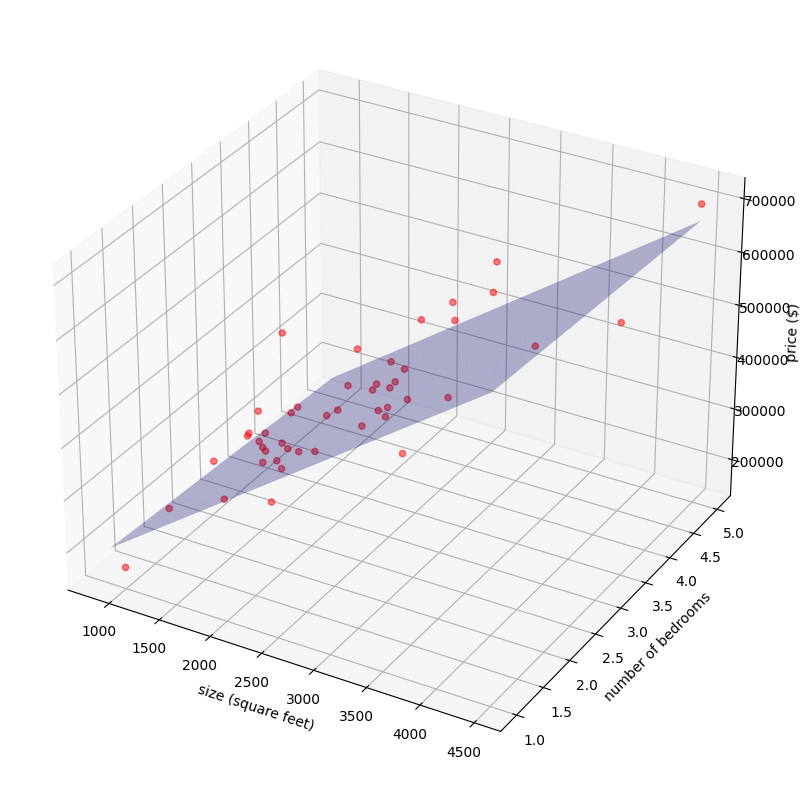

In [10]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['size (square feet)'], df['number of bedrooms']
           ,df['price ($)'], c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predicted.reshape(x_surf.shape), color='b', alpha=0.3)

ax.set_xlabel('size (square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price ($)')
plt.show()

- Comment:
    + The size of the houses contributes much more to the result than the number of bedrooms.
    + The 3D representation indicates that there are still many houses that are not fitted to the model (the purple plane).

## Predict Sample

In [11]:
sample = [1650, 3]
#todo
y_predict = model.predict(standardize_test_set(np.array([sample]), mu, sigma))
print(f'House price expected is {round(y_predict[0])}$')

House price expected is 293222$


## Save Results

In [12]:
#Save model
with open('model.json', 'w') as f:
    #todo
    json.dump({'theta: ': model.theta.tolist()}, f)
#Save prediction result
with open('price.json', 'w') as f:
    result = {
        #todo
        'size (square feet): ': sample[0],
        #todo
        'number of bedrooms': sample[1],
        #todo
        'price ($)': y_predict
    }
    json.dump(result, f)